In [121]:
!pip list

Package            Version
------------------ ---------
certifi            2025.1.31
charset-normalizer 3.4.1
colorama           0.4.6
idna               3.10
kagglehub          0.3.11
packaging          24.2
pip                25.0.1
PyYAML             6.0.2
requests           2.32.3
tqdm               4.67.1
urllib3            2.3.0


In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub

In [123]:
khus_calclaims_path = kagglehub.dataset_download("khusheekapoor/vehicle-insurance-fraud-detection")

print(khus_calclaims_path)

C:\Users\timdi\.cache\kagglehub\datasets\khusheekapoor\vehicle-insurance-fraud-detection\versions\1


In [124]:
khus_calclaims_df = pd.read_csv(khus_calclaims_path + "/carclaims.csv")
khus_calclaims_df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [125]:
khus_calclaims_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [126]:
"""
Month, WeekOfMonth and DayOfWeek are the date of the activation of police
Unnecessary info due to we don't know when the police was bought

Same for date of claim

AccidentArea is unusefull cause it's USA only places. Instead my aim is Russia

PolicyNumber is unusefull also - all numbers are unique and it's nohow related to claims
"""

"\nMonth, WeekOfMonth and DayOfWeek are the date of the activation of police\nUnnecessary info due to we don't know when the police was bought\n\nSame for date of claim\n\nAccidentArea is unusefull cause it's USA only places. Instead my aim is Russia\n\nPolicyNumber is unusefull also - all numbers are unique and it's nohow related to claims\n"

In [127]:
len(khus_calclaims_df["PolicyNumber"].unique()) / len(khus_calclaims_df)

1.0

In [128]:
unusefull_columns = [
    "Month",
    "WeekOfMonth",
    "DayOfWeek",
    "AccidentArea",
    "DayOfWeekClaimed",
    "MonthClaimed",
    "WeekOfMonthClaimed",
    "PolicyNumber"
]

khus_calclaims_df.drop(unusefull_columns, axis=1, inplace=True)

In [129]:
khus_calclaims_df["PolicyType"].unique()

array(['Sport - Liability', 'Sport - Collision', 'Sedan - Liability',
       'Utility - All Perils', 'Sedan - All Perils', 'Sedan - Collision',
       'Utility - Collision', 'Utility - Liability', 'Sport - All Perils'],
      dtype=object)

In [130]:
KHUS_POLICY_TYPE = {"Liability": "total", "Collision": "damage", "All Perils": "full"}


def policy_type_rename(x: str):
    return KHUS_POLICY_TYPE[x.split(" - ")[1]]


def vehicle_type_name(x: str):
    return x.split(" - ")[0]


khus_calclaims_df["VehicleType"] = khus_calclaims_df["PolicyType"].apply(vehicle_type_name)
khus_calclaims_df["PolicyType"] = khus_calclaims_df["PolicyType"].apply(policy_type_rename)

In [131]:
khus_calclaims_df["PolicyType"].unique()

array(['total', 'damage', 'full'], dtype=object)

In [132]:
khus_calclaims_df["VehiclePrice"].unique()

array(['more than 69,000', '20,000 to 29,000', '30,000 to 39,000',
       'less than 20,000', '40,000 to 59,000', '60,000 to 69,000'],
      dtype=object)

In [133]:
KHUS_VEHICLE_PRICE = {
    "more than 69,000": 75000,
    "20,000 to 29,000": 25000,
    "30,000 to 39,000": 35000,
    "less than 20,000": 10000,
    "40,000 to 59,000": 50000,
    "60,000 to 69,000": 65000
}

khus_calclaims_df["VehiclePrice"] = khus_calclaims_df["VehiclePrice"].replace(KHUS_VEHICLE_PRICE)

C:\Users\timdi\AppData\Local\Temp\ipykernel_16056\2229712660.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  khus_calclaims_df["VehiclePrice"] = khus_calclaims_df["VehiclePrice"].replace(KHUS_VEHICLE_PRICE)


In [134]:
khus_calclaims_df["VehiclePrice"].unique()

array([75000, 25000, 35000, 10000, 50000, 65000], dtype=int64)

In [135]:
KHUS_SUPPLIMENTS = {"none": 0, "1 to 2": 1, "3 to 5": 4, "more than 5": 6}

khus_calclaims_df["NumberOfSuppliments"] = khus_calclaims_df["NumberOfSuppliments"].replace(KHUS_SUPPLIMENTS)

C:\Users\timdi\AppData\Local\Temp\ipykernel_16056\1281750556.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  khus_calclaims_df["NumberOfSuppliments"] = khus_calclaims_df["NumberOfSuppliments"].replace(KHUS_SUPPLIMENTS)


In [136]:
khus_calclaims_df["NumberOfSuppliments"].unique()

array([0, 6, 4, 1], dtype=int64)

In [137]:
khus_calclaims_df["AgeOfPolicyHolder"].unique()

array(['26 to 30', '31 to 35', '41 to 50', '51 to 65', '21 to 25',
       '36 to 40', '16 to 17', 'over 65', '18 to 20'], dtype=object)

In [138]:
KHUS_AGE_OF_HOLDER = {
    "26 to 30": 28,
    "31 to 35": 33,
    "41 to 50": 46,
    "51 to 65": 57,
    "21 to 25": 23,
    "36 to 40": 38,
    "16 to 17": 17,
    "over 65": 70,
    "18 to 20": 19
}


def age_of_holder_rename(x: str):
    return KHUS_AGE_OF_HOLDER[x]


khus_calclaims_df["AgeOfPolicyHolder"] = khus_calclaims_df["AgeOfPolicyHolder"].apply(age_of_holder_rename)

In [139]:
khus_calclaims_df["AgeOfPolicyHolder"].unique()

array([28, 33, 46, 57, 23, 38, 17, 70, 19], dtype=int64)

In [140]:
khus_calclaims_df["AgeOfVehicle"].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [141]:
KHUS_AGE_OF_VEHICLE = {
    "3 years": 3,
    "6 years": 6,
    "7 years": 7,
    "more than 7": 9,
    "5 years": 5,
    "new": 0,
    "4 years": 4,
    "2 years": 2
}

khus_calclaims_df["AgeOfVehicle"] = khus_calclaims_df["AgeOfVehicle"].replace(KHUS_AGE_OF_VEHICLE)

C:\Users\timdi\AppData\Local\Temp\ipykernel_16056\910340663.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  khus_calclaims_df["AgeOfVehicle"] = khus_calclaims_df["AgeOfVehicle"].replace(KHUS_AGE_OF_VEHICLE)


In [142]:
khus_calclaims_df["AgeOfVehicle"].unique()

array([3, 6, 7, 9, 5, 0, 4, 2], dtype=int64)

In [143]:
khus_calclaims_df["NumberOfCars"].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [144]:
KHUS_NUMBER_CARS = {"1 vehicle": 1, "2 vehicles": 2, "3 to 4": 3, "5 to 8": 6, "more than 8": 9}

khus_calclaims_df["NumberOfCars"] = khus_calclaims_df["NumberOfCars"].replace(KHUS_NUMBER_CARS)

C:\Users\timdi\AppData\Local\Temp\ipykernel_16056\1046024540.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  khus_calclaims_df["NumberOfCars"] = khus_calclaims_df["NumberOfCars"].replace(KHUS_NUMBER_CARS)


In [145]:
khus_calclaims_df["NumberOfCars"].unique()

array([3, 1, 2, 6, 9], dtype=int64)

In [146]:
khus_calclaims_df["BasePolicy"].unique()

array(['Liability', 'Collision', 'All Perils'], dtype=object)

In [147]:
KHUS_BASE_POLICY = {"Liability": "total", "Collision": "damage", "All Perils": "full"}

khus_calclaims_df["BasePolicy"] = khus_calclaims_df["BasePolicy"].replace(KHUS_BASE_POLICY)

In [148]:
khus_calclaims_df["BasePolicy"].unique()

array(['total', 'damage', 'full'], dtype=object)

In [149]:
khus_calclaims_df[khus_calclaims_df["PolicyType"] != khus_calclaims_df["BasePolicy"]]

,Make,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,RepNumber,Deductible,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,VehicleType


In [150]:
khus_calclaims_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Make                  15420 non-null  object
 1   Sex                   15420 non-null  object
 2   MaritalStatus         15420 non-null  object
 3   Age                   15420 non-null  int64 
 4   Fault                 15420 non-null  object
 5   PolicyType            15420 non-null  object
 6   VehicleCategory       15420 non-null  object
 7   VehiclePrice          15420 non-null  int64 
 8   RepNumber             15420 non-null  int64 
 9   Deductible            15420 non-null  int64 
 10  DriverRating          15420 non-null  int64 
 11  Days:Policy-Accident  15420 non-null  object
 12  Days:Policy-Claim     15420 non-null  object
 13  PastNumberOfClaims    15420 non-null  object
 14  AgeOfVehicle          15420 non-null  int64 
 15  AgeOfPolicyHolder     15420 non-null

In [151]:
khus_calclaims_df.isna().sum()

Make                    0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
VehicleType             0
dtype: int64

In [152]:
khus_calclaims_df["FraudFound"].value_counts(normalize=True)

FraudFound
No     0.940143
Yes    0.059857
Name: proportion, dtype: float64

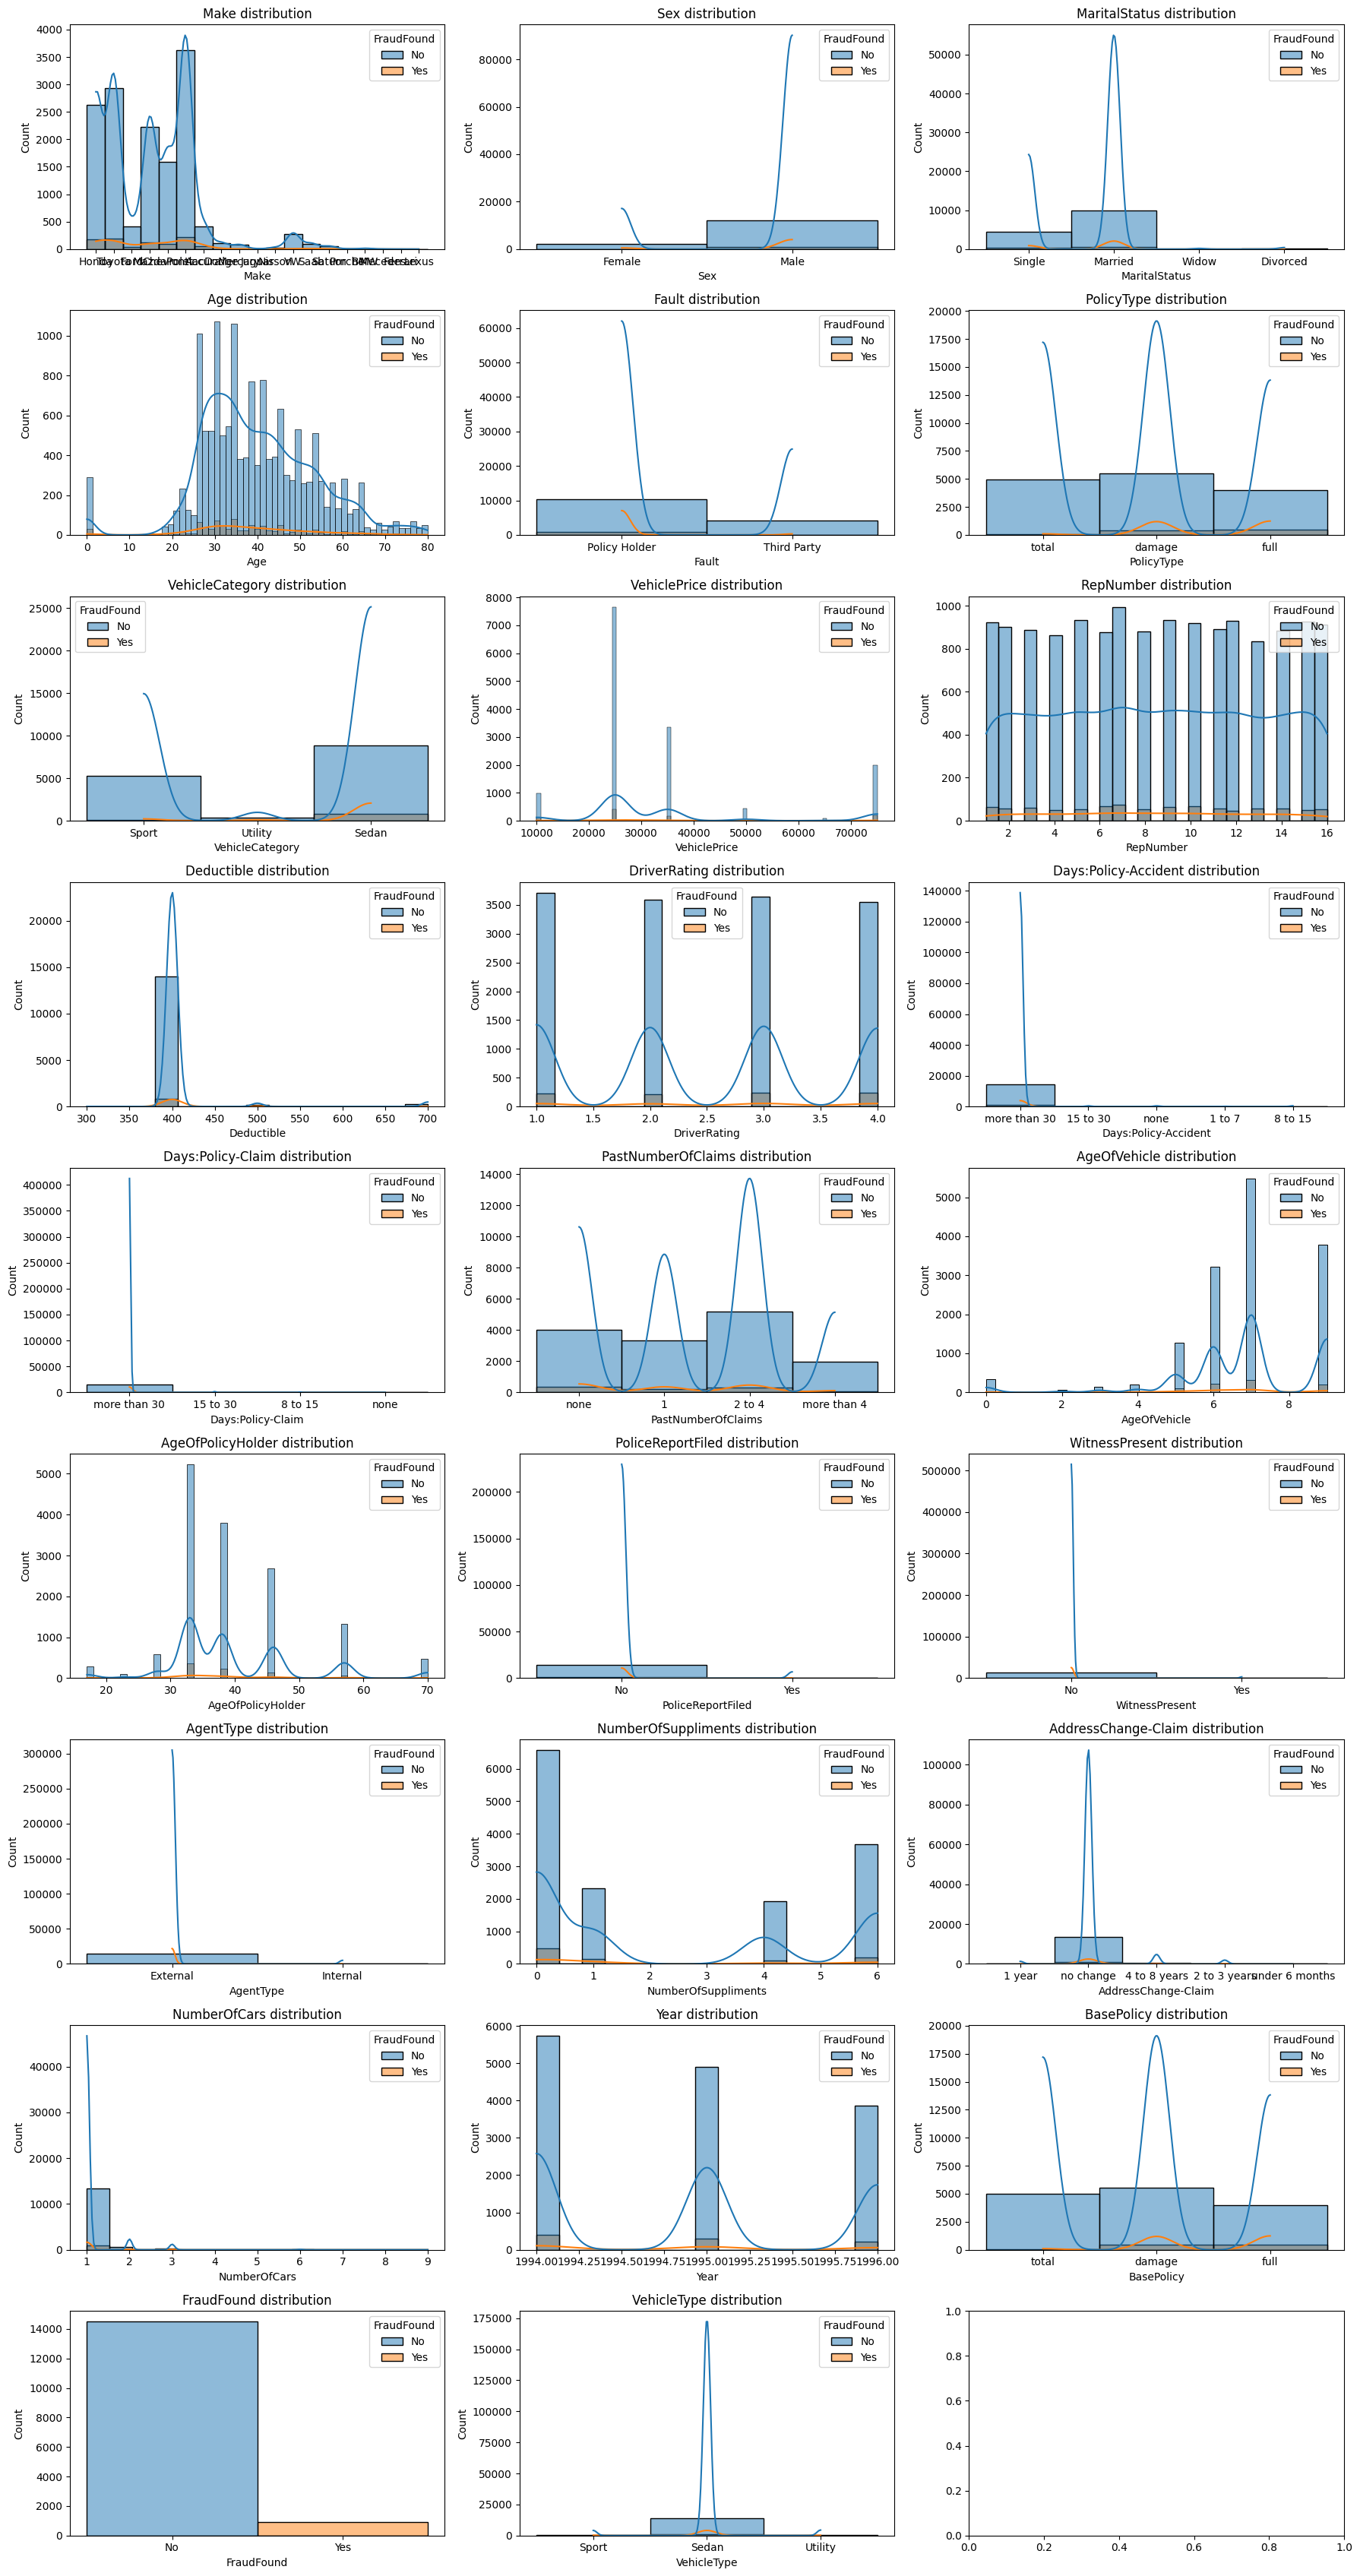

In [153]:
numerical_features = khus_calclaims_df.columns
fig, axes = plt.subplots(nrows = len(numerical_features) // 3 + 1, ncols=3, figsize=(18, 4 * len(numerical_features) // 3))
for i, feature in enumerate(numerical_features):
    row, col = i // 3, i % 3
    sns.histplot(data=khus_calclaims_df, x=feature, hue="FraudFound", ax=axes[row, col], kde=True)
    axes[row, col].set_title(f"{feature} distribution")
plt.tight_layout()
plt.show()

<Axes: >

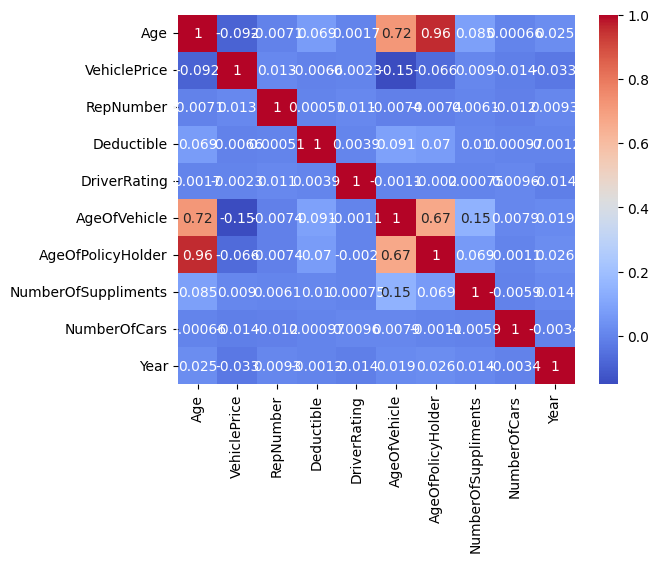

In [154]:
sns.heatmap(khus_calclaims_df.corr(numeric_only=True), annot=True, cmap="coolwarm")

In [155]:
y = khus_calclaims_df["FraudFound"]
x = khus_calclaims_df.drop("FraudFound", axis=1)

In [156]:
categorical_features = x.select_dtypes(include=["object"]).columns
categorical_features

Index(['Make', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'PoliceReportFiled', 'WitnessPresent',
       'AgentType', 'AddressChange-Claim', 'BasePolicy', 'VehicleType'],
      dtype='object')

In [157]:
numerical_features = x.select_dtypes(exclude=["object"]).columns
numerical_features

Index(['Age', 'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'NumberOfSuppliments',
       'NumberOfCars', 'Year'],
      dtype='object')

In [158]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(drop="first", sparse_output=False)

one_hot_encoded = onehot_encoder.fit_transform(
    x[categorical_features]
    )

one_hot_x = pd.DataFrame(
    one_hot_encoded,
    columns=onehot_encoder.get_feature_names_out(categorical_features)
    )

x_encoded = pd.concat([x[numerical_features], one_hot_x], axis=1)
x_encoded

,Age,VehiclePrice,RepNumber,Deductible,DriverRating,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,NumberOfCars,Year,...,WitnessPresent_Yes,AgentType_Internal,AddressChange-Claim_2 to 3 years,AddressChange-Claim_4 to 8 years,AddressChange-Claim_no change,AddressChange-Claim_under 6 months,BasePolicy_full,BasePolicy_total,VehicleType_Sport,VehicleType_Utility
0,21,75000,12,300,1,3,28,0,3,1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,34,75000,15,400,4,6,33,0,1,1994,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,47,75000,7,400,3,7,46,0,1,1994,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,65,25000,4,400,2,9,57,6,1,1994,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,27,75000,3,400,1,5,33,0,1,1994,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,35,25000,5,400,4,6,33,0,1,1996,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15416,30,35000,11,400,3,6,33,6,3,1996,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
15417,24,25000,4,400,4,5,28,1,1,1996,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15418,34,25000,6,400,4,2,33,6,1,1996,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [159]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

all_features = x_encoded.columns
x_processed = x_encoded.copy(deep=True)
x_processed[all_features] = standard_scaler.fit_transform(x_encoded[all_features])
x_processed

y_processed = y.replace({"Yes": 1, "No": 0})

C:\Users\timdi\AppData\Local\Temp\ipykernel_16056\1488718535.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_processed = y.replace({"Yes": 1, "No": 0})


In [160]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    x_processed, y_processed, test_size=0.2, random_state=42, stratify=y_processed
)

models = {
    "LogReg": LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42),
    "DesTree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "RandFor": RandomForestClassifier(class_weight="balanced", random_state=42, n_estimators=100),
    "AdaBoost": AdaBoostClassifier(random_state=42, n_estimators=100),
    "GradBoost": GradientBoostingClassifier(random_state=42, n_estimators=100),
    "SVM": SVC(class_weight="balanced", probability=True, random_state=42),
    "KNeighb": KNeighborsClassifier(n_neighbors=5),
    "NaiveBaes": GaussianNB(),
    "Perc": MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100, 50))
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1", n_jobs=-1)
    results[name] = cv_scores.mean()

In [161]:
from catboost import CatBoostClassifier, Pool
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score, make_scorer

catboost_X_train, catboost_X_test, catboost_y_train, catboost_y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

cat_features = x.columns[np.where(x.dtypes == object)[0]].values.tolist()

catboost_train_pool = Pool(catboost_X_train, catboost_y_train, cat_features=cat_features)
catboost_test_pool = Pool(catboost_X_test, catboost_y_test, cat_features=cat_features)

def catboost_evaluate(**__param_space):
    __param_space["depth"] = int(__param_space["depth"])
    __param_space["iterations"] = int(__param_space["iterations"])
    __param_space["border_count"] = int(__param_space["border_count"])
    model = CatBoostClassifier(
        **__param_space,
        loss_function="Logloss",
        eval_metric="AUC",
        verbose=0,
        random_seed=42,
        cat_features=cat_features
    )

    model.fit(catboost_train_pool, eval_set=catboost_test_pool, early_stopping_rounds=50)
    y_pred_proba = model.predict_proba(catboost_X_test)[:, 1]
    roc_auc = roc_auc_score(catboost_y_test, y_pred_proba)

    return roc_auc

pbounds = {
    'learning_rate': (0.01, 0.3),
    'depth': (4, 10),
    'l2_leaf_reg': (1, 10),
    'iterations': (500, 2000),
    'random_strength': (1e-9, 10),
    'bagging_temperature': (0, 10),
    'border_count': (32, 255)
}

optimizer = BayesianOptimization(
    f=catboost_evaluate,
    pbounds=pbounds,
    verbose=0,
    random_state=42,
)

optimizer.maximize(init_points=30, n_iter=100)

best_params = optimizer.max['params']
best_params['depth'] = int(best_params['depth'])
best_params['iterations'] = int(best_params['iterations'])
best_params['border_count'] = int(best_params['border_count'])

print(f"Best params: {best_params}")

optimized_catboost = CatBoostClassifier(
    **best_params,
    allow_writing_files=False,
    loss_function="Logloss",
    eval_metric="AUC",
    random_seed=42,
    verbose=100
)

optimized_catboost.fit(catboost_train_pool, eval_set=catboost_test_pool, early_stopping_rounds=50)

|   iter    |  target   | baggin... | border... |   depth   | iterat... | l2_lea... | learni... | random... |
-------------------------------------------------------------------------------------------------------------
| 1         | 0.8291    | 3.745     | 244.0     | 8.392     | 1.398e+03 | 2.404     | 0.05524   | 0.5808    |
| 2         | 0.8314    | 8.662     | 166.0     | 8.248     | 530.9     | 9.729     | 0.2514    | 2.123     |
| 3         | 0.8281    | 1.818     | 72.9      | 5.825     | 1.287e+03 | 4.888     | 0.09446   | 6.119     |
| 4         | 0.8286    | 1.395     | 97.15     | 6.198     | 1.184e+03 | 8.067     | 0.06791   | 5.142     |
| 5         | 0.8302    | 5.924     | 42.36     | 7.645     | 755.8     | 1.585     | 0.2852    | 9.656     |
| 6         | 0.8254    | 8.084     | 99.93     | 4.586     | 1.526e+03 | 4.961     | 0.04539   | 4.952     |
| 7         | 0.8302    | 0.3439    | 234.8     | 5.553     | 1.494e+03 | 3.805     | 0.1608    | 5.467     |
| 8       

In [162]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    if isinstance(y_pred, np.ndarray) and np.issubdtype(y_pred.dtype, np.integer):
        y_pred = y_pred
    else:
        y_pred = y_pred.replace({"No": 0, "Yes": 1}) if isinstance(y_pred, pd.Series) else [0 if pred == "No" else 1 for pred in y_pred]

    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    gini = 2 * roc_auc - 1

    print(f"\nModel name: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Gini: {gini:.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return {
        "model": model_name,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "gini": gini
    }

evaluation_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    result = evaluate_model(model, X_test, y_test, name)
    evaluation_results.append(result)

optimized_catboost_result = evaluate_model(optimized_catboost, catboost_X_test, catboost_y_test.replace({"Yes": 1, "No": 0}), "CatBoost")
evaluation_results.append(optimized_catboost_result)

results_df = pd.DataFrame(evaluation_results)
results_df = results_df.set_index("model")
results_df = results_df.sort_values(by="f1", ascending=False)

print(results_df)


Model name: LogReg
Accuracy: 0.6089
Precision: 0.1255
Recall: 0.9243
F1 Score: 0.2209
ROC AUC: 0.8049
Gini: 0.6098

Confusion Matrix:
[[1707 1192]
 [  14  171]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74      2899
           1       0.13      0.92      0.22       185

    accuracy                           0.61      3084
   macro avg       0.56      0.76      0.48      3084
weighted avg       0.94      0.61      0.71      3084


Model name: DesTree
Accuracy: 0.9043
Precision: 0.1687
Recall: 0.1514
F1 Score: 0.1595
ROC AUC: 0.5519
Gini: 0.1037

Confusion Matrix:
[[2761  138]
 [ 157   28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2899
           1       0.17      0.15      0.16       185

    accuracy                           0.90      3084
   macro avg       0.56      0.55      0.55      3084
weighted avg       0.90     

C:\Users\timdi\AppData\Local\Temp\ipykernel_16056\1625476687.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  optimized_catboost_result = evaluate_model(optimized_catboost, catboost_X_test, catboost_y_test.replace({"Yes": 1, "No": 0}), "CatBoost")


In [163]:
results_df

,accuracy,precision,recall,f1,roc_auc,gini
model,,,,,,
SVM,0.652075,0.132450,0.864865,0.229720,0.801747,0.603494
LogReg,0.608949,0.125459,0.924324,0.220930,0.804924,0.609849
DesTree,0.904345,0.168675,0.151351,0.159544,0.551874,0.103749
Perc,0.913100,0.157025,0.102703,0.124183,0.753171,0.506342
NaiveBaes,0.098898,0.060041,0.956757,0.112991,0.627111,0.254222
KNeighb,0.935149,0.222222,0.032432,0.056604,0.613869,0.227737
GradBoost,0.941310,0.833333,0.027027,0.052356,0.816735,0.633469
CatBoost,0.940986,1.000000,0.016216,0.031915,0.835656,0.671313
RandFor,0.940337,0.600000,0.016216,0.031579,0.789362,0.578723


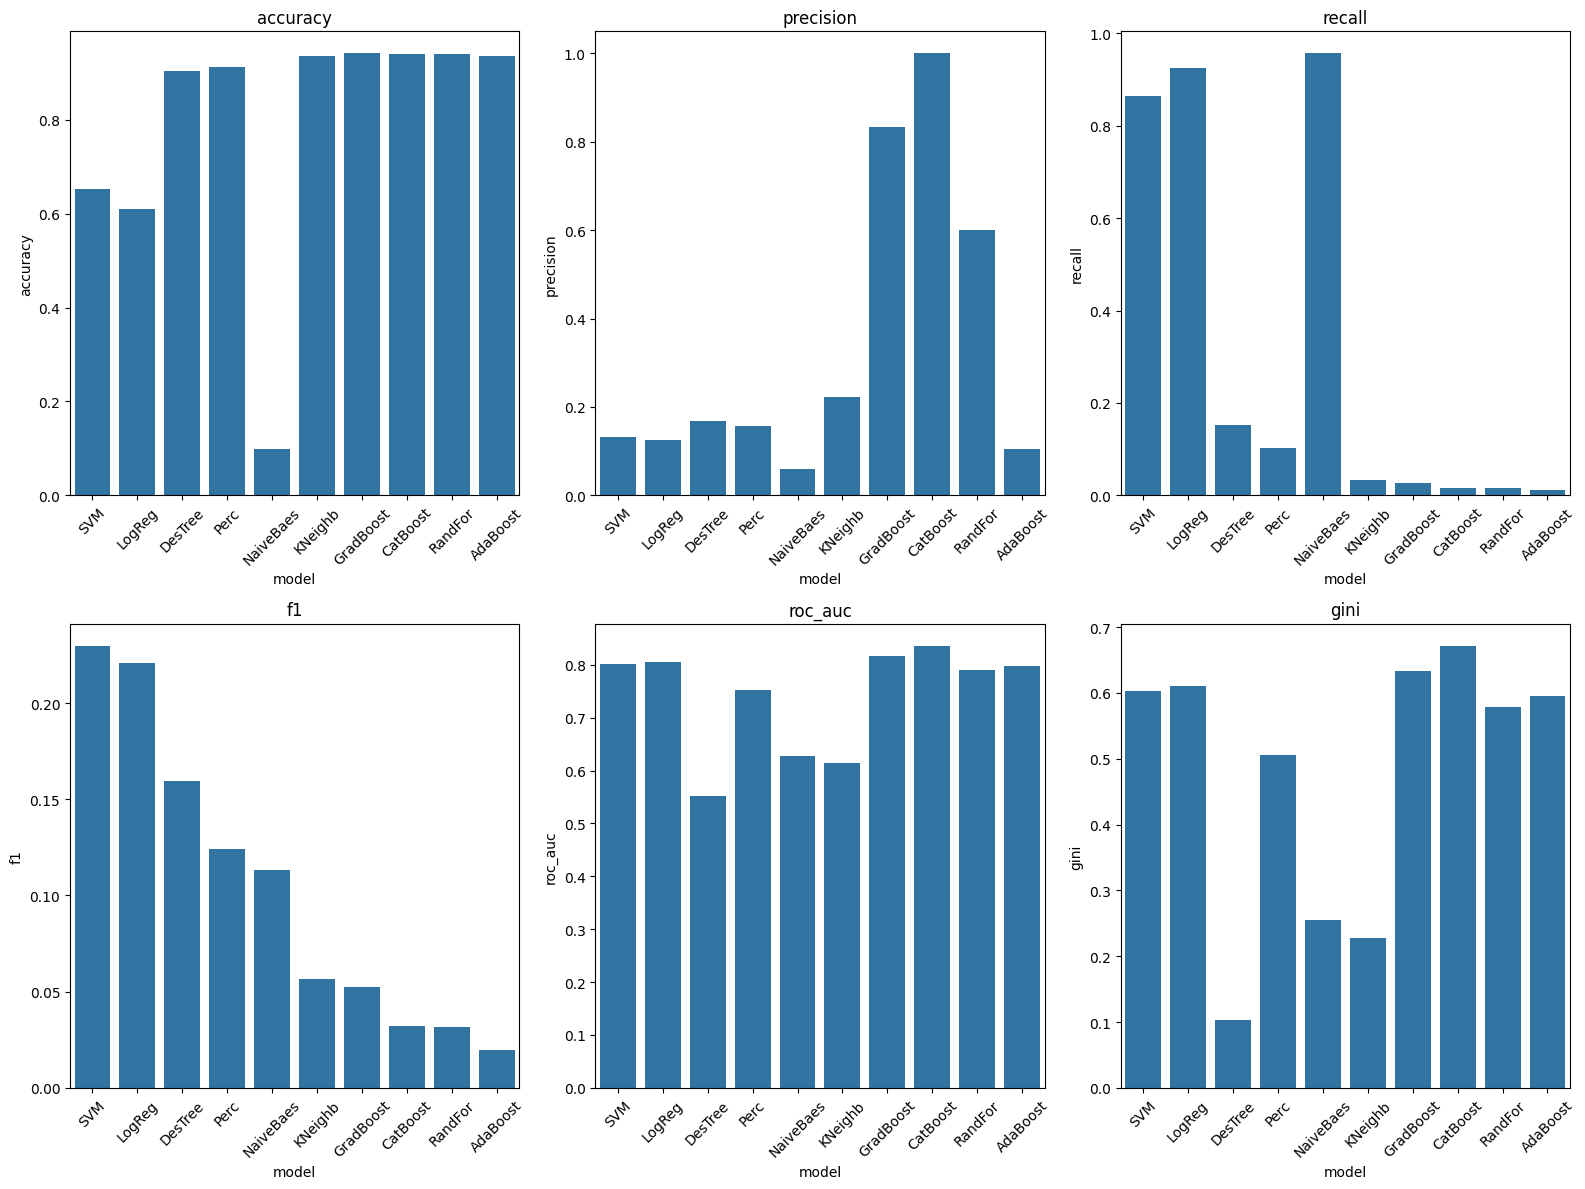

In [164]:
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc", "gini"]
plt.figure(figsize=(16, 12))

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x=results_df.index, y=results_df[metric])
    plt.title(f'{metric}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [165]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
x_resampled, y_resampled = smote_tomek.fit_resample(x_processed, y_processed)

pd.Series(y_resampled).value_counts(normalize=True)

FraudFound
0    0.5
1    0.5
Name: proportion, dtype: float64

In [166]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    x_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

models = {
    "LogReg": LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42),
    "DesTree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "RandFor": RandomForestClassifier(class_weight="balanced", random_state=42, n_estimators=100),
    "AdaBoost": AdaBoostClassifier(random_state=42, n_estimators=100),
    "GradBoost": GradientBoostingClassifier(random_state=42, n_estimators=100),
    "SVM": SVC(class_weight="balanced", probability=True, random_state=42),
    "KNeighb": KNeighborsClassifier(n_neighbors=5),
    "NaiveBaes": GaussianNB(),
    "Perc": MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100, 50))
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=cv, scoring="f1", n_jobs=-1)
    results[name] = cv_scores.mean()

In [171]:
catboost_X_train_resampled, catboost_X_test_resampled, catboost_y_train_resampled, catboost_y_test_resampled = train_test_split(
    x_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

cat_features = x_resampled.columns[np.where(x_resampled.dtypes != float)[0]].values.tolist()

catboost_train_pool = Pool(catboost_X_train_resampled, catboost_y_train_resampled, cat_features=cat_features)
catboost_test_pool = Pool(catboost_X_test_resampled, catboost_y_test_resampled, cat_features=cat_features)


def catboost_evaluate_resampled(**__param_space):
    __param_space["depth"] = int(__param_space["depth"])
    __param_space["iterations"] = int(__param_space["iterations"])
    __param_space["border_count"] = int(__param_space["border_count"])
    model = CatBoostClassifier(
        **__param_space,
        loss_function="Logloss",
        eval_metric="AUC",
        verbose=0,
        random_seed=42,
        cat_features=cat_features
    )

    model.fit(catboost_train_pool, eval_set=catboost_test_pool, early_stopping_rounds=50)
    y_pred_proba = model.predict_proba(catboost_X_test_resampled)[:, 1]
    roc_auc = roc_auc_score(catboost_y_test_resampled, y_pred_proba)

    return roc_auc


optimizer = BayesianOptimization(
    f=catboost_evaluate_resampled,
    pbounds=pbounds,
    verbose=0,
    random_state=42,
)

optimizer.maximize(init_points=30, n_iter=100)

best_params = optimizer.max['params']
best_params['depth'] = int(best_params['depth'])
best_params['iterations'] = int(best_params['iterations'])
best_params['border_count'] = int(best_params['border_count'])

print(f"Best params: {best_params}")

optimized_catboost_resampled = CatBoostClassifier(
    **best_params,
    allow_writing_files=False,
    loss_function="Logloss",
    eval_metric="AUC",
    random_seed=42,
    verbose=100
)

optimized_catboost_resampled.fit(catboost_train_pool, eval_set=catboost_test_pool, early_stopping_rounds=50)

Best params: {'bagging_temperature': 5.393422419156507, 'border_count': 212, 'depth': 9, 'iterations': 977, 'l2_leaf_reg': 1.9904673207490908, 'learning_rate': 0.07610119713716308, 'random_strength': 4.271077886835456}
0:	test: 0.8120456	best: 0.8120456 (0)	total: 25.7ms	remaining: 25.1s
100:	test: 0.9910648	best: 0.9910648 (100)	total: 2.56s	remaining: 22.2s
200:	test: 0.9929872	best: 0.9931030 (188)	total: 5.07s	remaining: 19.6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.993103041
bestIteration = 188

Shrink model to first 189 iterations.


In [172]:
evaluation_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    result = evaluate_model(model, X_test_resampled, y_test_resampled, name)
    evaluation_results.append(result)

optimized_catboost_result = evaluate_model(optimized_catboost_resampled, catboost_X_test_resampled, catboost_y_test_resampled.replace({"Yes": 1, "No": 0}), "CatBoost")
evaluation_results.append(optimized_catboost_result)

results_df = pd.DataFrame(evaluation_results)
results_df = results_df.set_index("model")
results_df = results_df.sort_values(by="f1", ascending=False)

print(results_df)


Model name: LogReg
Accuracy: 0.7708
Precision: 0.6993
Recall: 0.9499
F1 Score: 0.8056
ROC AUC: 0.8262
Gini: 0.6525

Confusion Matrix:
[[1714 1183]
 [ 145 2751]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.59      0.72      2897
           1       0.70      0.95      0.81      2896

    accuracy                           0.77      5793
   macro avg       0.81      0.77      0.76      5793
weighted avg       0.81      0.77      0.76      5793


Model name: DesTree
Accuracy: 0.7815
Precision: 0.9845
Recall: 0.5718
F1 Score: 0.7235
ROC AUC: 0.7814
Gini: 0.5628

Confusion Matrix:
[[2871   26]
 [1240 1656]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.99      0.82      2897
           1       0.98      0.57      0.72      2896

    accuracy                           0.78      5793
   macro avg       0.84      0.78      0.77      5793
weighted avg       0.84     

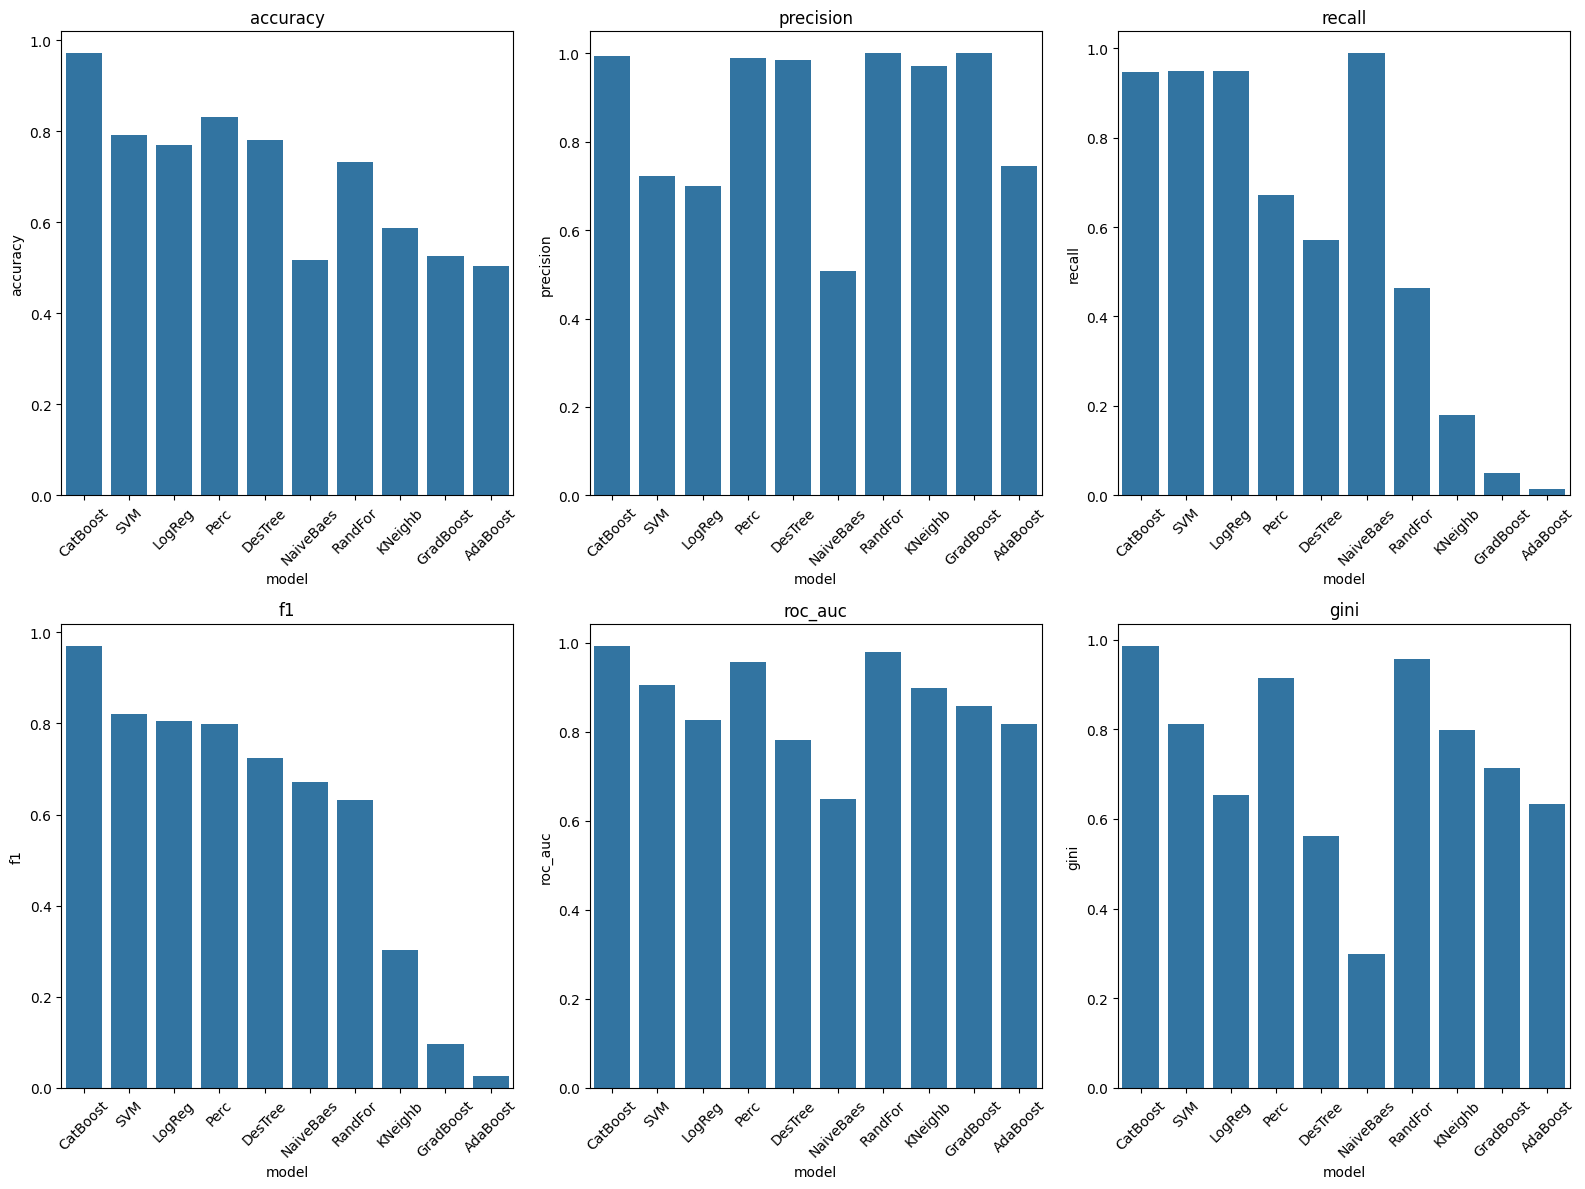

In [173]:
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc", "gini"]
plt.figure(figsize=(16, 12))

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x=results_df.index, y=results_df[metric])
    plt.title(f'{metric}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [174]:
import pickle

optimized_catboost_resampled.save_model("catboost_fraud_detection_model.cbm")

feature_names = list(catboost_X_test_resampled.columns)
with open("feature_names.pkl", "wb") as f:
    pickle.dump(feature_names, f)

with open("onehotencoder.pkl", "wb") as f:
    pickle.dump(onehot_encoder, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(standard_scaler, f)

In [177]:
CatBoostClassifier().load_model()

Index(['Make', 'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'VehicleType'],
      dtype='object')